# Genetic Programming

## Introduction using GPLearn

[GPLearn](https://github.com/trevorstephens/gplearn) is a GP framework that uses an API similar to scikit-learn. In this example we will try to solve a symbolic regression problem, in two dimensions (i.e., with two input variables). 

First of all, we import the necessary library, includein the unes used for the plotting

In [1]:
%matplotlib notebook

import gplearn.genetic as gp
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
import sklearn.utils as skutil
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Here we define the target function as $f(x,y) = \sin(3x) + \sin(3y)$. You can change it in any way you want

In [2]:
def target(x, y):
    return np.sin(3*x) + np.sin(3*y)

The function that we want to learn is then evaluated in $10^5$ equally sapaced points in $[-1,1] \times [-1,1]$

In [3]:
x_coords = np.linspace(-1, 1, 100)
y_coords = np.linspace(-1, 1, 100)
x_coords, y_coords = np.meshgrid(x_coords,y_coords)
target_points = target(x_coords,y_coords)

Here we display the target function

<IPython.core.display.Javascript object>


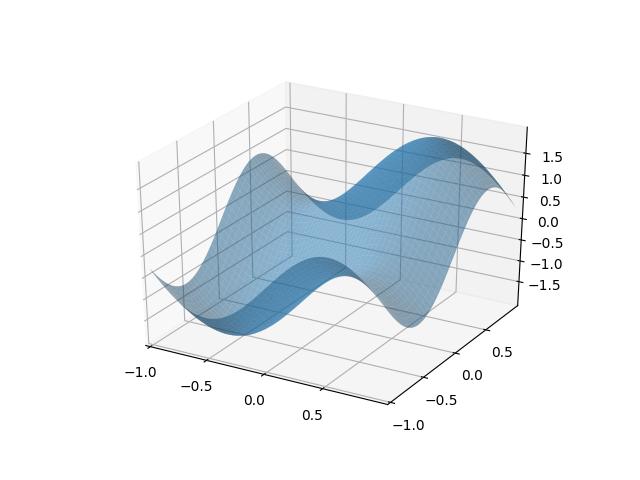

In [4]:
figure = plt.figure().gca(projection='3d')
figure.set_xlim(-1,1)
figure.set_ylim(-1,1)
figure.set_xticks(np.arange(-1,1,.5))
figure.set_yticks(np.arange(-1,1,.5))
figure.plot_surface(x_coords, y_coords, target_points, alpha=0.5)
plt.show()

For the learning process we select $100$ random points in $[-1,1]\times[-1,1]$. That is, GP does not have direct access to the function but only to a subset of points sampled from it.

In [5]:
rng = skutil.check_random_state(0)

x_train = rng.uniform(-1, 1, 100).reshape(50, 2)
y_train = target(x_train[:, 0], x_train[:, 1])

Here we perform the actual GP run. Usually we can directly set the parameter `generations` to the maximum number of generations. Here, however, we stop after every generation to collect the best individual at that generation.

The set of functional sysmbols contains, in addition to the usual $+$, $\times$, $-$ and $\div$, also the functions $\sin$, $\cos$, $\sqrt{\cdot}$. Try to change them to see how the solutions found change.

In [6]:
fset=('add', 'sub', 'mul', 'div', 'sin', 'cos', 'sqrt')
predicted_data = []
max_gen = 31
sr = gp.SymbolicRegressor(population_size=500,
                          generations=1,
                          function_set=fset,
                          stopping_criteria=0.01,
                          p_crossover=0.8, # Probability of performing subtree crossover
                          p_subtree_mutation=0.1, # Probability of subtree mutation
                          p_hoist_mutation=0.05, # Small probability of hoist mutation
                          p_point_mutation=0.05, # Small probability of point mutation
                          parsimony_coefficient=0.01, # Penalization of large trees
                          verbose=1, # Set to 1 to obtain the fitness values
                          random_state=0,
                          warm_start=True)
for i in range(0, max_gen):
    sr.set_params(generations=i+1)
    sr.fit(x_train, y_train)
    predicted_data.append(sr.predict(np.c_[x_coords.ravel(),y_coords.ravel()]).reshape(x_coords.shape))

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    16.22          4.43711       13         0.447815              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   1     6.88         0.935719       13         0.447815              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   2     5.28         0.817432       13         0.447815              N/A      0.00s
    |   Po

  25     8.97         0.711671       10         0.373517              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
  26     9.07         0.669815       10         0.368398              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
  27     8.99         0.757866       10         0.368398              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
  28     9

FInally, we display the functions found by the GP process. It is possible to check how the solution changes with time.

In [7]:
def print_results(i):
    figure = plt.figure().gca(projection='3d')
    figure.set_xlim(-1,1)
    figure.set_ylim(-1,1)
    figure.set_xticks(np.arange(-1,1,.5))
    figure.set_yticks(np.arange(-1,1,.5))
    figure.plot_surface(x_coords, y_coords, predicted_data[i], alpha=0.5, color='red')
    figure.plot_surface(x_coords, y_coords, target_points, alpha=0.1)

interact(print_results, i=widgets.IntSlider(min=0,max=30,step=5,value=0))
plt.show()

interactive(children=(IntSlider(value=0, description='i', max=30, step=5), Output()), _dom_classes=('widget-in…

As it is possible to observe, around generation $30$ GP was able to find the optimal solution.